In [1]:
import geopandas as gpd
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm, PowerNorm
import seaborn as sns
from tqdm import tqdm
import numpy as np
import pandas as pd
import shapely
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io import img_tiles

# I/O

In [2]:
pth_merged = '/Volumes/metis/ABOVE3/Merged_inventories/aleb_glakes.shp'
pth_glakes_ts = '/Volumes/metis/Datasets/GLAKES/GLAKES area time series.csv'

In [3]:
gdf_merged = gpd.read_file(pth_merged)
df_glakes_ts = pd.read_csv(pth_glakes_ts)

# Join
'area_2010_2019_wm' = invalid obs are masked\
'area_2010_2019_nm' = invalid obs inside lake are included

In [4]:
## Inner join
gdf_merged_joined = gdf_merged.merge(df_glakes_ts, on='Lake_id')
gdf_merged_joined = gpd.GeoDataFrame(
    gdf_merged_joined, geometry=shapely.points(gdf_merged_joined['longitude'], gdf_merged_joined['latitude']), crs='EPSG:4326')

In [5]:
gdf_merged_joined.head()

,Sample_nam,Date,Location,latitude,longitude,EID,lat,long,pco2uatm,Reference,...,Rser_flag,Shape_Leng,Shape_Area,geometry,area_1984_1999_wm,area_2000_2009_wm,area_2010_2019_wm,area_1984_1999_nm,area_2000_2009_nm,area_2010_2019_nm
0,Abraham Lake,9/16/2016,Yukon Flats,66.189000,-146.720000,a0,NaN,NaN,NaN,NaN,...,0.0,0.0800,0.000139,POINT (-146.72000 66.18900),0.664159,0.668569,0.679648,0.666750,0.668843,0.679378
1,Atqasuk Summer 08-12-12,8/12/2012,North Alaska,70.327230,-156.806550,a2,NaN,NaN,NaN,NaN,...,0.0,0.0995,0.000344,POINT (-156.80655 70.32723),0.000000,0.000000,0.000000,1.429877,1.430839,1.423184
2,Backdoor 07-17-19,7/17/2019,Wekweeti,64.203778,-114.257712,a3,NaN,NaN,NaN,NaN,...,0.0,0.4280,0.000716,POINT (-114.25771 64.20378),3.707591,3.797908,3.781240,3.721846,3.809612,3.792168
3,Balloon lake 1 08-05-19,8/5/2019,PAD,58.878560,-111.252690,a5,NaN,NaN,NaN,NaN,...,0.0,0.0380,0.000028,POINT (-111.25269 58.87856),0.058785,0.080864,0.082146,0.059340,0.081494,0.082521
4,Barrow 2 Summer 08-13-12,8/13/2012,North Alaska,71.175560,-156.897310,a6,NaN,NaN,NaN,NaN,...,0.0,0.2140,0.000958,POINT (-156.89731 71.17556),0.000000,0.000000,0.000000,3.638815,3.667867,3.749362


In [44]:
gdf_merged_joined['pch_1984_2019'] = (gdf_merged_joined.area_2010_2019_nm -
    gdf_merged_joined.area_1984_1999_nm) / gdf_merged_joined.area_1984_1999_nm * 100

Text(0.5, 0, 'Lake area change 1984 - 2019 (%)')

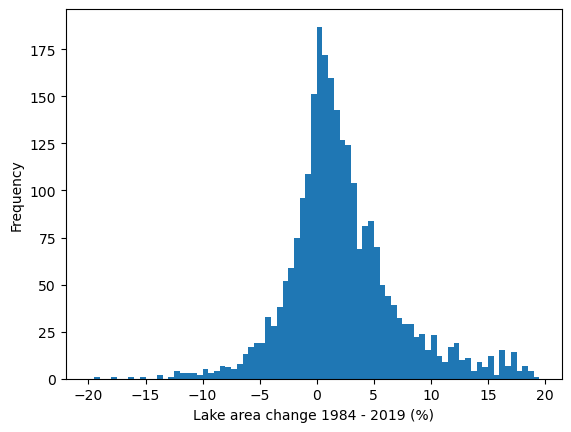

In [27]:
gdf_merged_joined['pch_1984_2019'].plot.hist(bins=np.arange(-20, 20, 0.5))
plt.xlabel('Lake area change 1984 - 2019 (%)')

In [45]:
print(f"Median change: {gdf_merged_joined['pch_1984_2019'].median():0.1f}")
print(f"Mean change: {gdf_merged_joined['pch_1984_2019'].mean():0.1f}")
print(f"n = {gdf_merged_joined['pch_1984_2019'].count()} / {len(gdf_merged)}")

Median change: 1.6
Mean change: 4.4
n = 2674 / 8795


<Axes: >

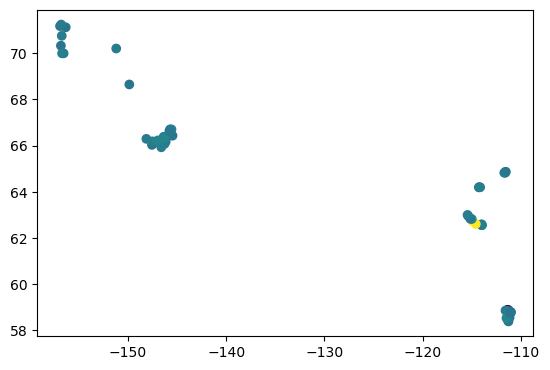

In [24]:
gdf_merged_joined.plot(c=gdf_merged_joined.pch_1984_2019)

# Write out shapefiles

In [26]:
gdf_merged_joined.to_file(
    '/Volumes/metis/ABOVE3/Merged_inventories/add_glakes_stats/aleb_glakes_stats.shp', engine='pyogrio')

/var/folders/rv/sn0kln2103b9fs4xl56n3w7w0000gn/T/ipykernel_9856/638398262.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_merged_joined.to_file(
/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/pyogrio/raw.py:456: RuntimeWarning: Normalized/laundered field name: 'area_1984_1999_wm_x' to 'area_1984_'
  ogr_write(
/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/pyogrio/raw.py:456: RuntimeWarning: Normalized/laundered field name: 'area_2000_2009_wm_x' to 'area_2000_'
  ogr_write(
/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/pyogrio/raw.py:456: RuntimeWarning: Normalized/laundered field name: 'area_2010_2019_wm_x' to 'area_2010_'
  ogr_write(
/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/site-packages/pyogrio/raw.py:456: RuntimeWarning: Normalized/laundered field name: 'area_1984_1999_nm_x' to 'area_198_1'
  ogr_write(
/Users/ekyzivat/mambaforge/envs/geo/lib/python3.11/